# Trabalho 1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

BLUE = '\033[94m'
PURPLE = '\033[95m'
CYAN = '\033[96m'
GREEN = '\033[92m'
RED = '\033[91m'
YELLOW = '\033[93m'
ORANGE = '\033[33m'
WHITE = '\033[37m'
BLACK_BG = '\033[40m'
END = '\033[0m'

In [3]:
class Event:
  def __init__(self, type, timestamp, id):
    self.type = type
    self.timestamp = timestamp
    self.id = id

  def __str__(self):
    return f'{self.type} {self.id} {self.timestamp:.2f}'

## Fila M/M/1

In [18]:
def generate_next_arrival(arrival_rate):
  return np.random.exponential(1/arrival_rate)

def generate_next_departure(service_rate):
  return np.random.exponential(1/service_rate)

def print_queue(L):
  print(f'[{", ".join([str(event) for event in L])}]')

def mm1_simulation(arrival_rate, service_rate, max_iter, max_queue_len):
  L = [] # Lista de eventos (Fila de prioridades)
  N = 0 # Número de clientes na fila (variavel de estado)
  clock = 0
  customer_number = 0
  clocks = []
  Ns = []
  meanNs = []
  meanCs = []
  meanN = 0
  meanC = 0

  def schedule_event(type, timestamp):
    nonlocal customer_number  # Permite acesso à variável customer_number declarada fora da função
    event = Event(type, timestamp, customer_number)
    L.append(event) # Adiciona evento
    L.sort(key=lambda x: x.timestamp) # Ordena fila por prioridade (timestamp)
    customer_number += 1  # Incrementa o número do cliente para o próximo evento

  # Simulação começa com chegada de cliente
  schedule_event('Arrival', generate_next_arrival(arrival_rate))

  # Plano de controle (enquanto a fila não estiver vazia e o número máximo de
  # iterações não for atingido)
  is_busy = True
  while len(L) > 0 and max_iter > 0:
    e = L.pop(0) # Remove evento e da fila (de prioridades) de eventos
    clock = e.timestamp # Atualiza relógio

    # Sortear tempo da próxima chegada e agendar evento
    # Se N = 1, sortear tempo da próxima partida e agendar partida
    if e.type == 'Arrival':
      if max_queue_len == -1 or N < max_queue_len:
        schedule_event('Arrival', clock + generate_next_arrival(arrival_rate))
        N += 1
        print(f'{GREEN}{clock:.2f}: Cliente chega (N = {N}){END}')
        if N == 1:
          schedule_event('Departure', clock + generate_next_departure(service_rate))
      else:
        print(f'{RED}{clock:.2f}: Cliente desiste (N = {N}){END}')

    # Se N > 0, sortear tempo da próxima partida e agendar partida
    if e.type == 'Departure':
      if N > 0:
        # Se servidor estava ocioso, servidor volta a atender
        if not is_busy:
          print(f'{CYAN}{clock:.2f}: Servidor volta a atender (N = {N}){END}')
        N -= 1
        is_busy = True
        schedule_event('Departure', clock + generate_next_departure(service_rate))
        print(f'{YELLOW}{clock:.2f}: Cliente parte (N = {N}){END}')

    # Se N = 0 e servidor estava ocupado, servidor fica ocioso
    if N == 0 and is_busy:
      print(f'{BLUE}{clock:.2f}: Servidor ocioso (N = {N}){END}')
      is_busy = False

    max_iter -= 1 # Decrementa variável de controle

    # Calcula métricas
    if (len(Ns) > 0 and len(clocks) > 0):
      meanN += Ns[-1] * (clock - clocks[-1])
      meanC += (clock - clocks[-1]) / clock
    meanNs.append(meanN / clock)
    meanCs.append(meanC / N if N > 0 else 0)
    Ns.append(N)
    clocks.append(clock)
  return Ns, clocks, meanNs, meanCs

def plotGraph(Ns, clocks, meanNs, meanCs):
  fig, ax = plt.subplots(figsize=(16,4))
  fig, bx = plt.subplots(figsize=(16,4))
  NsInt = range(min(Ns), math.ceil(max(Ns)) + 1)
  ax.set_yticks(NsInt)
  # Plot the Ns data
  ax.plot(clocks[:-1], Ns[:-1], drawstyle="steps-post", label="N")
  # Plot the meanNs data
  ax.plot(clocks[:-1], meanNs[:-1], linestyle="dashed", label="E[N]")
  # Plot the meanNs data
  bx.plot(clocks[:-1], meanCs[:-1], label="E[T]")
  # Plot das labels
  ax.set_xlabel("Clock")
  bx.set_xlabel("Clock")
  ax.set_ylabel("N")
  bx.set_ylabel("Tempo médio de espera (E[T])")
  ax.set_title("Número de clientes (N) na fila versus Clock")
  bx.set_title("Tempo médio de espera (E[T]) versus Clock")
  # Add a legend
  ax.legend()
  bx.legend()
  # Plot
  plt.show()

def mm1(arrival_rate, service_rate, max_iter, max_queue_len, iterations=2):
  counter = 0
  clocks = []
  Ns = []
  meanNs = []
  meanCs = []
  while counter < iterations:
    print(f'{BLACK_BG}{WHITE}Simulação #{counter+1}{END}')
    Ns, clocks, meanNs, meanCs = mm1_simulation(arrival_rate, service_rate, max_iter, max_queue_len)
    print()
    counter += 1
  plotGraph(Ns, clocks, meanNs, meanCs)

Executando a função

Simulação #1
0.76: Cliente chega (N = 1)
1.04: Cliente parte (N = 0)
1.04: Servidor ocioso (N = 0)
1.06: Cliente chega (N = 1)
1.20: Servidor volta a atender (N = 1)
1.20: Cliente parte (N = 0)
1.20: Servidor ocioso (N = 0)
3.07: Cliente chega (N = 1)
4.49: Servidor volta a atender (N = 1)
4.49: Cliente parte (N = 0)
4.49: Servidor ocioso (N = 0)
5.24: Cliente chega (N = 1)
5.72: Cliente chega (N = 2)
7.96: Cliente chega (N = 3)
8.23: Cliente chega (N = 4)
9.09: Servidor volta a atender (N = 4)
9.09: Cliente parte (N = 3)
9.42: Cliente parte (N = 2)
11.11: Cliente parte (N = 1)
13.68: Cliente parte (N = 0)
13.68: Servidor ocioso (N = 0)
14.13: Cliente chega (N = 1)
14.41: Servidor volta a atender (N = 1)
14.41: Cliente parte (N = 0)
14.41: Servidor ocioso (N = 0)



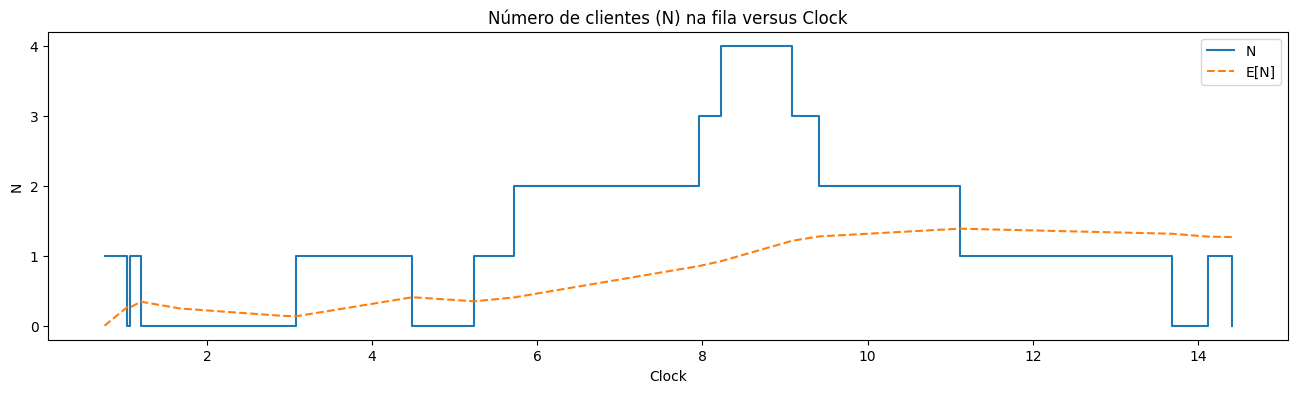

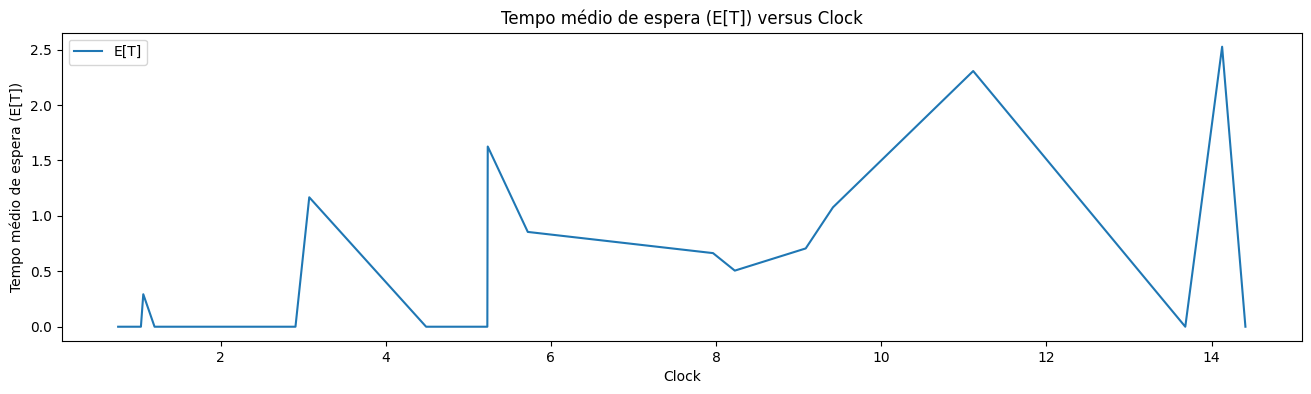

In [19]:
mm1(0.5, 1, 20, -1, 1)

## Ruína do apostador

In [ ]:
def generate_next_event(probability, timestamp):
  if np.random.rand() < probability:
    return Event('Win', timestamp, 1)
  else:
    return Event('Lose', timestamp, -1)

def gambler_ruin(probability, goal, starting_amount):
  amount = starting_amount # Equivalente a primeira chegada
  round = 0 # Número de rodadas ("clock")

  # Plano de controle (enquanto o apostador não atingir o objetivo ou falir)
  while amount > 0 and amount < goal:
    round += 1
    event = generate_next_event(probability, round)
    amount += event.id

    #
    if event.type == 'Win':
      print(f'{PURPLE}{round}: Jogador ganhou {event.id} | Montante: {amount}{END}')

    if event.type == 'Lose':
      print(f'{BLUE}{round}: Jogador perdeu {event.id*-1} | Montante: {amount}{END}')

  # Imprime resultado
  if amount == goal:
    print(f'O apostador atingiu o objetivo de {goal} em {round} rodadas')
  else:
    print(f'O apostador faliu em {round} rodadas')

def gambler(win_probability, goal, starting_amount, iterations=2):
  counter = 0
  while counter < iterations:
    print(f'{BLACK_BG}{WHITE}Simulação #{counter+1}{END}')
    gambler_ruin(win_probability, goal, starting_amount)
    print()
    counter += 1

In [ ]:
gambler(0.5, 5, 2, 4)

Simulação #1
1: Jogador ganhou 1 | Montante: 3
2: Jogador perdeu 1 | Montante: 2
3: Jogador perdeu 1 | Montante: 1
4: Jogador ganhou 1 | Montante: 2
5: Jogador perdeu 1 | Montante: 1
6: Jogador perdeu 1 | Montante: 0
O apostador faliu em 6 rodadas

Simulação #2
1: Jogador perdeu 1 | Montante: 1
2: Jogador perdeu 1 | Montante: 0
O apostador faliu em 2 rodadas

Simulação #3
1: Jogador ganhou 1 | Montante: 3
2: Jogador ganhou 1 | Montante: 4
3: Jogador perdeu 1 | Montante: 3
4: Jogador ganhou 1 | Montante: 4
5: Jogador perdeu 1 | Montante: 3
6: Jogador perdeu 1 | Montante: 2
7: Jogador ganhou 1 | Montante: 3
8: Jogador perdeu 1 | Montante: 2
9: Jogador perdeu 1 | Montante: 1
10: Jogador ganhou 1 | Montante: 2
11: Jogador ganhou 1 | Montante: 3
12: Jogador ganhou 1 | Montante: 4
13: Jogador perdeu 1 | Montante: 3
14: Jogador ganhou 1 | Montante: 4
15: Jogador ganhou 1 | Montante: 5
O apostador atingiu o objetivo de 5 em 15 rodadas

Simulação #4
1: Jogador ganhou 1 | Montante: 3
2: Jogador 